# Системы линейных уравнений

Линейные уравнения — это тот тип уравнений, который изучает линейная алгебра. В ней всё плоско, никаких кривулин. Даже если это стомерное пространство, всё равно там всё плоско и ровно. Линейное уравнение описывает всякое прямое/плоское: линии, плоскости, гиперплоскости.  

Уравнение прямой на плоскости имеет следующий вид:  

$$
ax + by + c = 0,
$$  

где $x, y$ - переменные, а $a, b, c$ - постоянные коэффициенты.

Переменные в линейных уравнениях всегда в первой степени. И никогда не будет произведений вроде $x \cdot y$.

Чеще всего в линейной алгебре имеют дело с линейными системами, а не с отдельными уравнениями.
Например:

$$
\begin{cases} 
   x & - & 2y & = & 1 \\
   3x & + & 2y & = & 11
\end{cases}
$$

Геометрический смысл решения этой системы в том, что две линии могут иметь, ровно одну точку перечесения.

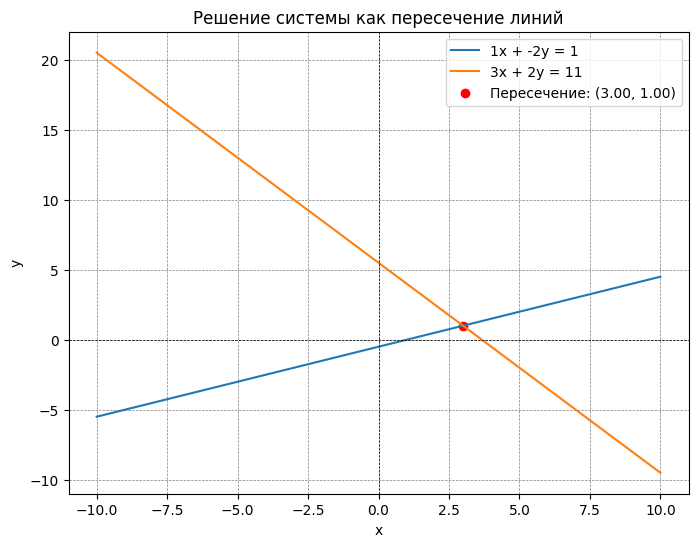

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_linear_system(matrix, free_vector):
    # Check if the system is 2x2
    if matrix.shape != (2, 2) or len(free_vector) != 2:
        raise ValueError("This function only supports 2x2 systems.")

    # Extract coefficients from the matrix
    a1, b1 = matrix[0]
    a2, b2 = matrix[1]
    c1, c2 = free_vector

    # Define equations for plotting
    # Equation 1: a1 * x + b1 * y = c1 => y = (c1 - a1 * x) / b1
    # Equation 2: a2 * x + b2 * y = c2 => y = (c2 - a2 * x) / b2

    # Create x values
    x = np.linspace(-10, 10, 400)

    # Define y values based on the equations
    y1 = (c1 - a1 * x) / b1 if b1 != 0 else None
    y2 = (c2 - a2 * x) / b2 if b2 != 0 else None

    # Solve the system of equations to find the intersection point
    intersection = np.linalg.solve(matrix, free_vector)

    # Plot the lines
    plt.figure(figsize=(8, 6))
    if y1 is not None:
        plt.plot(x, y1, label=f"{a1}x + {b1}y = {c1}")
    else:
        plt.axvline(c1 / a1, color="blue", label=f"{a1}x + {b1}y = {c1}")

    if y2 is not None:
        plt.plot(x, y2, label=f"{a2}x + {b2}y = {c2}")
    else:
        plt.axvline(c2 / a2, color="green", label=f"{a2}x + {b2}y = {c2}")

    # Plot the intersection point
    plt.scatter(*intersection, color="red", label=f"Пересечение: ({intersection[0]:.2f}, {intersection[1]:.2f})")

    # Add labels and legend
    plt.title("Решение системы как пересечение линий")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
    plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()

matrix = np.array([[1, -2], [3, 2]])
free_vector = np.array([1, 11])
plot_linear_system(matrix, free_vector)


Из прошлого блокнота ясно, что система может иметь бесконечное множество решений (в этом случае прямые совпадают) или вообще не иметь решений (в этом случае прямые параллельны).

Также в прошлом блокноте демонстрируется, что такую систему можно записать в виде линейной комбинации или в матричном виде:

$$
\begin{cases} 
   x & - & 2y & = & 1, \\
   3x & + & 2y & = & 11
\end{cases}
\quad
\Leftrightarrow
\quad
x
\begin{bmatrix} 
   1\\
   3
\end{bmatrix} +
y
\begin{bmatrix} 
   -2\\
   2
\end{bmatrix} =
\begin{bmatrix} 
   1\\
   11
\end{bmatrix}
\quad
\Leftrightarrow
\quad
\begin{bmatrix} 
   1 & -2\\
   3 & 2
\end{bmatrix}
\begin{bmatrix} 
   x\\
   y
\end{bmatrix}
=
\begin{bmatrix} 
   1\\
   11
\end{bmatrix}
$$

Решение системы заключается в том, чтобы найти такую линейную комбинацию, которая даст вектор свободных коэффициентов $\boldsymbol{b}$.